# dCAM: Dimension-wise Class Activation Map for Explaining Multivariate Data Series Classification

### Paul Boniol, Mohammed Meftah, Emmanuel Remy, Themis Palpanas

Data series classification is an important and challenging problem in data science. Explaining the classification decisions by finding the discriminant parts of the input that led the algorithm to some decision is a real need in many applications. Convolutional neural networks perform well for the data series classification task; though, the explanations provided by this type of algorithms are poor for the specific case of multivariate data series. Addressing this important limitation is a significant challenge. In this paper, we
propose a novel method that solves this problem by highlighting
both the temporal and dimensional discriminant information. Our
contribution is two-fold: we first describe a convolutional architecture that enables the comparison of dimensions; then, we propose a method that returns dCAM, a Dimension-wise Class Activation Map specifically designed for multivariate time series (and CNNbased models). Experiments with several synthetic and real datasets demonstrate that dCAM is not only more accurate than previous approaches, but the only viable solution for discriminant feature discovery and classification explanation in multivariate time series. This Notebook aims to reproduce and illustrate the results depicted in the paper.

The paper can be found here: https://helios2.mi.parisdescartes.fr/~themisp/publications/sigmod22-dcam.pdf




In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import interpolate

---

# Experimental Evaluation

We implemented our algorithms in Python 3.5 using the PyTorch
library. The evaluation was conducted on a server with Intel
Core i7-8750H CPU 2.20GHz x 12, with 31.3GB RAM, and Quadro
P1000/PCle/SSE2 GPU with 4.2GB RAM, and on Jean Zay cluster
with Nvidia Tesla V100 SXM2 GPU with 32 GB RAM. We provide both a way to run our code on a single node and on a cluster.

## Reproduce the experiments

This notebook is using results pre-computed. You can reproduce and run the experiments on your own. To do follow the guidlines in each section.


---

# Classification Accuracy evaluation (Section 5.3)

We first evaluate the classification performance of our proposed
approaches (denoted as c-Baselines and d-Baselines in Table 2) and
the different baselines (denoted as Baselines in Table 2) over the
UCR/UEA multivariate data series. We run each method five times
and report the average classification accuracy. Be aware that, as any neural network methods, the training and the prediction is undterministic. Therefore, the results reported in the table below might not be exactly the same. For execution time reasons, we repeated each training only 3 times instaead of 10 as reported in the paper. However, the trends and conclusions still holds.

You can modify the training parameters in script_exp.py file for single node execution and script_exp_gpu_parallel.py file for parallel execution:

```python
parameters = {
    'train_test_r': 0.80,    # Dataset training and testing split ratio
    'batch_size': 8,         # Number of instances in one batch
    'nb_epoch': 1000,        # Number of epoches
    'nb_repeat_iteration': 3 # Number of training iteration
}
```

## Reproduce this experiments

To reproduce this experiment, go to the folder classification/scripts/ and run the following steps:

### Single node execution

You can either run the following script:

```bash
python script_exp.py
```

This script will run the entire experiment sequencially. Therefore, it might take a very long time. The results will be stored in results/log folder. An aggregated tables summarizing the results will be created at the end of the execution and sorted in results/merged_results.csv. 


### Parallel execution

We suggest you to use a dedicated infrastruture on which you can this experiment in parallel. To do so, we provide a SLURM version of our code. to run this version, follow these steps:

- Modify submit_generic.py such that the template of the bash scripts is compatible with your infrastruture.


- Run the following command:
```bash
python script_exp_gpu_parallel.py
```
- This script will generate one bash file for each dataset and model that will be then run in parallel. These batch files will be stored in auto_script folder.



- Then, run the following command:
```bash
chmod 777 submit_all.sh
./submit_all.sh
```
- All the SLURM jobs will be laucnhed using sbatch command. The log files for each jobs will be stored in auto_script/output_log folder.



- The results will be stored in results/log folder. At the end of the execution, please run the following command:
```bash
python script_generate_merged_results.py
```
- An aggregated tables summarizing the results will be created  and sorted in results/merged_results.csv. 


---

## Experimental Results


In [153]:
methods = ['mtex','cnn','resnet','inception','lstm','rnn','gru','ccnn','cresnet','cinception','dcnn','dresnet','dinception']

df_classification = pd.read_csv('experiments/classification/results/merged_results.csv')
df_classification.rename(columns={'Unnamed: 0':'datasets'}, inplace=True)
df_classification.set_index('datasets', inplace=True)

df_classification_average = pd.DataFrame()
df_classification_average['mean_accuracy'] = df_classification.mean()
df_classification_average['mean_rank'] = df_classification[methods].rank(1,method='min',ascending=False).mean()
display(df_classification)
display(df_classification_average.T)

,mtex,cnn,resnet,inception,lstm,rnn,gru,ccnn,cresnet,cinception,dcnn,dresnet,dinception
datasets,,,,,,,,,,,,,
AtrialFibrillation,0.500000,0.500000,0.444444,0.500000,0.666667,0.722222,0.666667,0.666667,0.555556,0.833333,0.500000,0.500000,0.555556
Libras,0.828704,0.976852,0.990741,0.861111,0.476852,0.763889,0.601852,0.837963,0.847222,0.699074,0.912037,0.967593,0.722222
BasicMotions,0.937500,1.000000,1.000000,1.000000,0.812500,0.770833,0.812500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
RacketSports,0.748634,0.956284,0.983607,0.923497,0.737705,0.732240,0.721311,0.950820,1.000000,0.879781,0.939891,1.000000,0.934426
Epilepsy,0.993939,1.000000,1.000000,0.975758,0.769697,0.600000,0.830303,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
StandWalkJum,0.611111,0.500000,0.388889,0.611111,0.500000,0.444444,0.555556,0.888889,1.000000,0.944444,1.000000,1.000000,0.888889
UWaveGestureLibrary,0.958333,0.946970,0.958333,0.939394,0.886364,0.946970,0.905303,0.753788,0.776515,0.647727,0.886364,0.954545,0.875000
Handwriting,0.351667,0.875000,0.940000,0.648333,0.375000,0.430000,0.418333,0.425000,0.720000,0.428333,0.788333,0.931667,0.543333
NATOPS,0.870370,0.986111,0.986111,0.930556,0.796296,0.898148,0.800926,0.875000,0.921296,0.842593,0.967593,0.986111,0.921296


,mtex,cnn,resnet,inception,lstm,rnn,gru,ccnn,cresnet,cinception,dcnn,dresnet,dinception
mean_accuracy,0.692424,0.739601,0.745197,0.725984,0.625797,0.644854,0.645029,0.697997,0.758386,0.692677,0.737495,0.775132,0.714378
mean_rank,7.260870,4.826087,4.434783,5.608696,9.739130,9.043478,9.130435,7.826087,5.043478,7.347826,5.590909,3.136364,5.545455


Text(0.5, 1.0, 'Average rank per method')

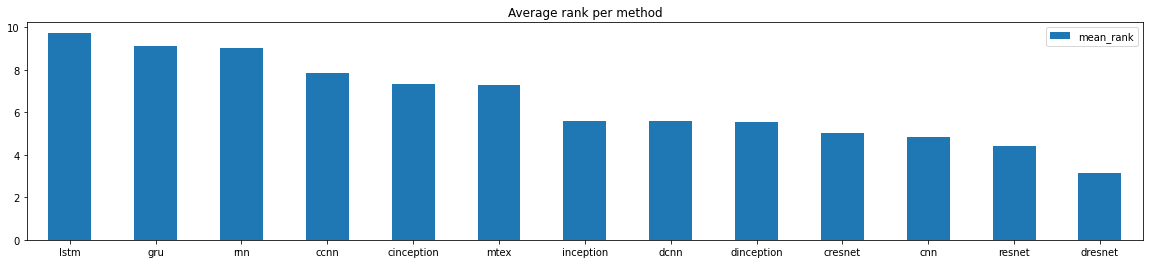

In [154]:
df_classification_average.sort_values('mean_rank', ascending=False).plot.bar(y='mean_rank',figsize=(20,4))
plt.xticks(rotation=0)
plt.title("Average rank per method")

Text(0.5, 0, 'Inception Time/cInception Time/MTEX')

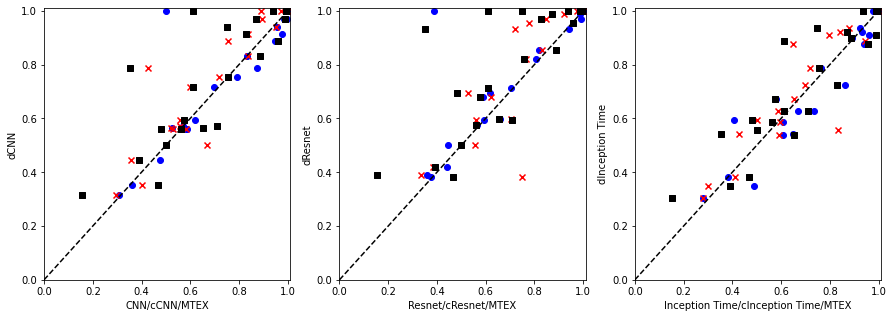

In [155]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(df_classification['cnn'],df_classification['dcnn'],c='blue',marker='o')
plt.scatter(df_classification['ccnn'],df_classification['dcnn'],c='red',marker='x')
plt.scatter(df_classification['mtex'],df_classification['dcnn'],c='black',marker='s')
plt.plot([0,1],[0,1],color='black',linestyle='--')
plt.xlim(0,1.01)
plt.ylim(0,1.01)
plt.ylabel('dCNN')
plt.xlabel('CNN/cCNN/MTEX')

plt.subplot(1,3,2)
plt.scatter(df_classification['resnet'],df_classification['dresnet'],c='blue',marker='o')
plt.scatter(df_classification['cresnet'],df_classification['dresnet'],c='red',marker='x')
plt.scatter(df_classification['mtex'],df_classification['dresnet'],c='black',marker='s')
plt.plot([0,1],[0,1],color='black',linestyle='--')
plt.xlim(0,1.01)
plt.ylim(0,1.01)
plt.ylabel('dResnet')
plt.xlabel('Resnet/cResnet/MTEX')

plt.subplot(1,3,3)
plt.scatter(df_classification['inception'],df_classification['dinception'],c='blue',marker='o')
plt.scatter(df_classification['cinception'],df_classification['dinception'],c='red',marker='x')
plt.scatter(df_classification['mtex'],df_classification['dinception'],c='black',marker='s')
plt.plot([0,1],[0,1],color='black',linestyle='--')
plt.xlim(0,1.01)
plt.ylim(0,1.01)
plt.ylabel('dInception Time')
plt.xlabel('Inception Time/cInception Time/MTEX')



---

# Discriminant Features Identification (Section 5.4)



We now evaluate the classification accuracy (C-acc) and the discriminant features identification accuracy (Dr-acc) on synthetically
built datasets. Table 3 depicts both C-acc and Dr-acc on Type 1 and
2 datasets, when varying the number of dimensions from 10 to 100.
In this experiment, we keep as baselines only ResNet and cResNet,
which are the most accurate methods among all other baselines.

the prediction is undterministic. Therefore, the results reported in the table below might not be exactly the same. For execution time reasons, we repeated each training only 3 times instaead of 10 as reported in the paper. However, the trends and conclusions still holds.

You can modify the training parameters in script_exp.py file for single node execution and script_exp_gpu_parallel.py file for parallel execution:

```python
parameters = {
    'train_test_r': 0.80,    # Dataset training and testing split ratio
    'batch_size': 8,         # Number of instances in one batch
    'nb_epoch': 1000,        # Number of epoches
    'nb_repeat_iteration': 3 # Number of training iteration
}
```

## Reproduce this experiments: Classification Evaluation

To reproduce this experiment, go to the folder explanation/scripts_classification_eval/ and run the following steps:

### Single node execution

You can either run the following script:

```bash
python script_exp.py
```

This script will run the entire experiment sequencially. Therefore, it might take a very long time. The results will be stored in results_classification/log folder. An aggregated tables summarizing the results will be created at the end of the execution and sorted in results_classification/merged_results_classification.csv. 


### Parallel execution

We suggest you to use a dedicated infrastruture on which you can this experiment in parallel. To do so, we provide a SLURM version of our code. to run this version, follow these steps:

- Modify submit_generic.py such that the template of the bash scripts is compatible with your infrastruture.


- Run the following command:
```bash
python script_exp_gpu_parallel.py
```
- This script will generate one bash file for each dataset and model that will be then run in parallel. These batch files will be stored in auto_script folder.



- Then, run the following command:
```bash
chmod 777 submit_all.sh
./submit_all.sh
```
- All the SLURM jobs will be laucnhed using sbatch command. The log files for each jobs will be stored in auto_script/output_log folder.



- The results will be stored in results/log folder. At the end of the execution, please run the following command:
```bash
python script_generate_merged_results.py
```
- An aggregated tables summarizing the results will be created  and sorted in results_classification/merged_results_classification.csv. 


---
## Reproduce this experiments: Discriminant Features Identification Evaluation

To reproduce this experiment, go to the folder explanation/scripts_explanation_eval/ and run the following steps:

### Single node execution

You can either run the following script:

```bash
python script_exp.py
```

This script will run the entire experiment sequencially. Therefore, it might take a very long time. The results will be stored in results_classification/log folder. An aggregated tables summarizing the results will be created at the end of the execution and sorted in results_explanation/merged_results_explanation.csv. 

### Parallel execution

We suggest you to use a dedicated infrastruture on which you can this experiment in parallel. To do so, we provide a SLURM version of our code. to run this version, follow these steps:

- Modify submit_generic.py such that the template of the bash scripts is compatible with your infrastruture.


- Run the following command:
```bash
python script_exp_gpu_parallel.py
```
- This script will generate one bash file for each dataset and model that will be then run in parallel. These batch files will be stored in auto_script folder.



- Then, run the following command:
```bash
chmod 777 submit_all.sh
./submit_all.sh
```
- All the SLURM jobs will be laucnhed using sbatch command. The log files for each jobs will be stored in auto_script/output_log folder.



- The results will be stored in results/log folder. At the end of the execution, please run the following command:
```bash
python script_generate_merged_results.py
```
- An aggregated tables summarizing the results will be created  and sorted in results_explanation/merged_results_explanation.csv. 



---

## Experimental Results: Classification Evaluation

In [157]:
methods = ['mtex','resnet','cresnet','dcnn','dresnet','dinception']

df_classification_synth = pd.read_csv('experiments/explanation/results_classification/merged_results_classification.csv')
df_classification_synth.rename(columns={'Unnamed: 0':'datasets'}, inplace=True)
df_classification_synth.set_index('datasets', inplace=True)

df_classification_synth_average = pd.DataFrame()
df_classification_synth_average['mean_accuracy'] = df_classification_synth.mean()
df_classification_synth_average['mean_rank'] = df_classification_synth[methods].rank(1,method='min',ascending=False).mean()
display(df_classification_synth)
display(df_classification_synth_average.T)

,mtex,resnet,cresnet,dcnn,dresnet,dinception
datasets,,,,,,
synth_ShapesAll_type1_nbdim_10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
synth_ShapesAll_type1_nbdim_20,1.000000,0.868333,1.000000,1.000000,1.000000,1.000000
synth_ShapesAll_type1_nbdim_40,0.996667,0.680000,1.000000,1.000000,1.000000,1.000000
synth_ShapesAll_type1_nbdim_60,0.913333,0.651667,1.000000,1.000000,1.000000,1.000000
synth_ShapesAll_type1_nbdim_100,0.570000,0.588333,1.000000,1.000000,1.000000,0.981667
synth_ShapesAll_type2_nbdim_10,0.596667,0.766667,0.596667,1.000000,1.000000,0.966667
synth_ShapesAll_type2_nbdim_20,0.538333,0.603333,0.581667,1.000000,1.000000,0.875000
synth_ShapesAll_type2_nbdim_40,0.563333,0.605000,0.561667,0.851667,0.716667,0.711667
synth_ShapesAll_type2_nbdim_60,0.573333,0.611667,0.573333,0.715000,0.593333,0.665000


,mtex,resnet,cresnet,dcnn,dresnet,dinception
mean_accuracy,0.69625,0.679417,0.78875,0.906417,0.878042,0.842083
mean_rank,4.70000,4.350000,2.65000,1.700000,1.850000,2.900000


Text(0.5, 1.0, 'Average rank per method')

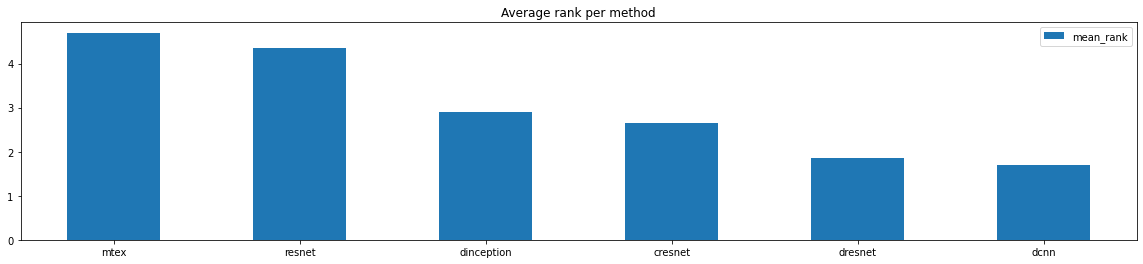

In [158]:
df_classification_synth_average.sort_values('mean_rank', ascending=False).plot.bar(y='mean_rank',figsize=(20,4))
plt.xticks(rotation=0)
plt.title("Average rank per method")

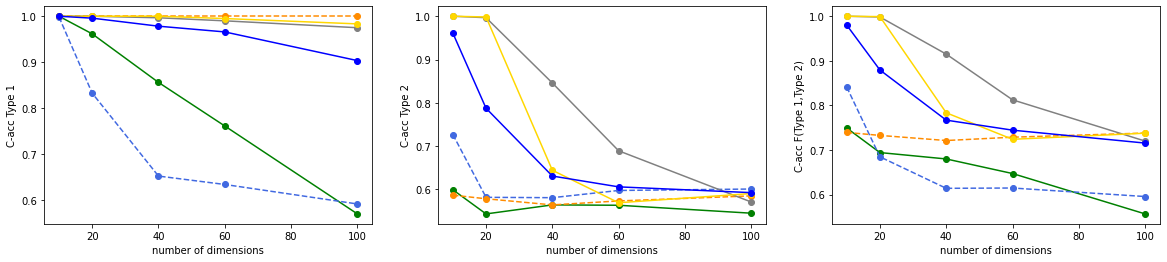

In [159]:
dataset_name = ['ShapesAll','starlight']
types = [1,2]
dims = [10,20,40,60,100]
pattern_name = 'synth_{}_type{}_nbdim_{}'

methods_color = ['green','royalblue','darkorange','grey','gold','blue']
methods_style = ['-','--','--','-','-','-']


list_type_1 = {method:[] for method in methods}
list_type_2 = {method:[] for method in methods}
list_type_F = {method:[] for method in methods}

for dim in dims:
    for method in methods:
        tmp_1 = []
        tmp_2 = []
        for dataset in dataset_name:
            val_1 = df_classification_synth.loc[pattern_name.format(dataset,1,dim)][method]
            val_2 = df_classification_synth.loc[pattern_name.format(dataset,2,dim)][method]
            tmp_1.append(val_1)
            tmp_2.append(val_2)
        list_type_1[method].append(np.mean(tmp_1))
        list_type_2[method].append(np.mean(tmp_2))
        list_type_F[method].append((2*np.mean(tmp_2)*np.mean(tmp_1))/(np.mean(tmp_2)+np.mean(tmp_1)))
            
            

plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
for style,color,method in zip(methods_style,methods_color,methods):
    plt.plot(dims,list_type_1[method],marker='o',linestyle=style,color=color)
plt.xlabel('number of dimensions')
plt.ylabel('C-acc Type 1')
    
plt.subplot(1,3,2)
for style,color,method in zip(methods_style,methods_color,methods):
    plt.plot(dims,list_type_2[method],marker='o',linestyle=style,color=color)
plt.xlabel('number of dimensions')
plt.ylabel('C-acc Type 2')

plt.subplot(1,3,3)
plt.xlabel('number of dimensions')
plt.ylabel('C-acc F(Type 1,Type 2)')
for style,color,method in zip(methods_style,methods_color,methods):
    plt.plot(dims,list_type_F[method],marker='o',linestyle=style,color=color)


---

## Experimental Results: Discriminant Features Identification Evaluation

In [160]:
df_explanation_synth = pd.read_csv('experiments/explanation/results_explanation/merged_results_explanation.csv')
df_explanation_synth.rename(columns={'Unnamed: 0':'datasets'}, inplace=True)
df_explanation_synth.set_index('datasets', inplace=True)

df_explanation_synth_average = pd.DataFrame()
df_explanation_synth_average['mean_accuracy'] = df_explanation_synth.mean()
df_explanation_synth_average['mean_rank'] = df_explanation_synth[methods].rank(1,method='min',ascending=False).mean()
display(df_explanation_synth)
display(df_explanation_synth_average.T)

,mtex,resnet,cresnet,dcnn,dresnet,dinception
datasets,,,,,,
synth_ShapesAll_type1_nbdim_10,0.542385,0.092734,0.779917,0.556526,0.754868,0.704127
synth_ShapesAll_type1_nbdim_20,0.549572,0.031800,0.792017,0.511180,0.770258,0.349503
synth_ShapesAll_type1_nbdim_40,0.349617,0.008465,0.799459,0.414699,0.631102,0.564770
synth_ShapesAll_type1_nbdim_60,0.022645,0.005705,0.843239,0.438962,0.555048,0.505367
synth_ShapesAll_type1_nbdim_100,0.012102,0.002646,0.908953,0.435013,0.446992,0.438184
synth_ShapesAll_type2_nbdim_10,0.030361,0.045034,0.144853,0.533635,0.670685,0.321777
synth_ShapesAll_type2_nbdim_20,0.024542,0.021929,0.136291,0.326249,0.617281,0.458521
synth_ShapesAll_type2_nbdim_40,0.005521,0.006323,0.004864,0.349042,0.370021,0.461074
synth_ShapesAll_type2_nbdim_60,0.016446,0.003458,0.004708,0.277558,0.384835,0.282510


,mtex,resnet,cresnet,dcnn,dresnet,dinception
mean_accuracy,0.108448,0.019437,0.452012,0.313531,0.406226,0.26032
mean_rank,4.200000,5.500000,2.850000,3.200000,1.900000,3.35000


Text(0.5, 1.0, 'Average rank per method')

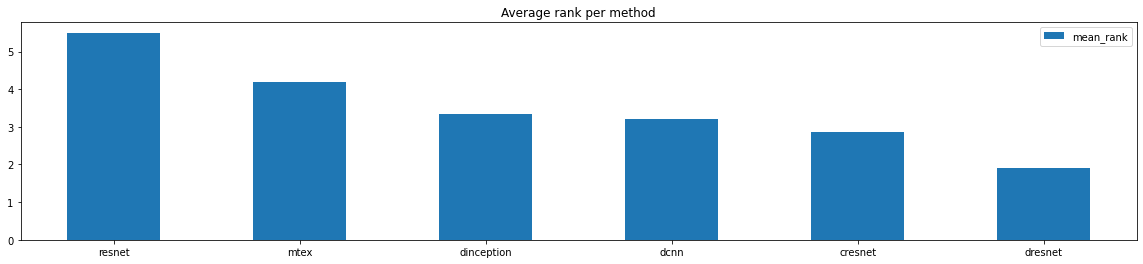

In [161]:
df_explanation_synth_average.sort_values('mean_rank', ascending=False).plot.bar(y='mean_rank',figsize=(20,4))
plt.xticks(rotation=0)
plt.title("Average rank per method")

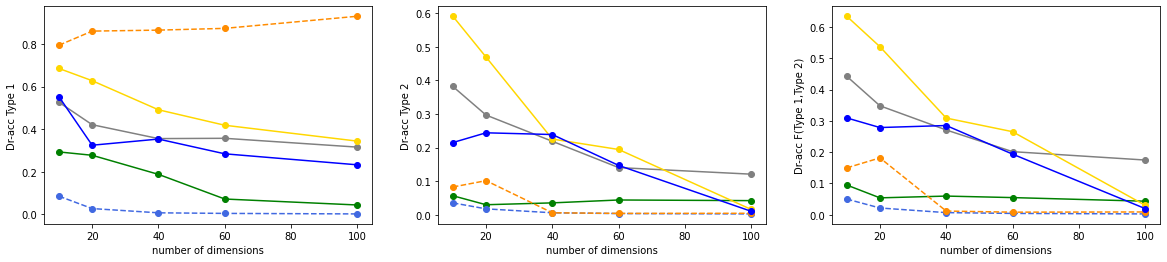

In [162]:
list_type_1 = {method:[] for method in methods}
list_type_2 = {method:[] for method in methods}
list_type_F = {method:[] for method in methods}

for dim in dims:
    for method in methods:
        tmp_1 = []
        tmp_2 = []
        for dataset in dataset_name:
            val_1 = df_explanation_synth.loc[pattern_name.format(dataset,1,dim)][method]
            val_2 = df_explanation_synth.loc[pattern_name.format(dataset,2,dim)][method]
            tmp_1.append(val_1)
            tmp_2.append(val_2)
        list_type_1[method].append(np.mean(tmp_1))
        list_type_2[method].append(np.mean(tmp_2))
        list_type_F[method].append((2*np.mean(tmp_2)*np.mean(tmp_1))/(np.mean(tmp_2)+np.mean(tmp_1)))
            
            

plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
for style,color,method in zip(methods_style,methods_color,methods):
    plt.plot(dims,list_type_1[method],marker='o',linestyle=style,color=color)
plt.xlabel('number of dimensions')
plt.ylabel('Dr-acc Type 1')
    
plt.subplot(1,3,2)
for style,color,method in zip(methods_style,methods_color,methods):
    plt.plot(dims,list_type_2[method],marker='o',linestyle=style,color=color)
plt.xlabel('number of dimensions')
plt.ylabel('Dr-acc Type 2')

plt.subplot(1,3,3)
plt.xlabel('number of dimensions')
plt.ylabel('Dr-acc F(Type 1,Type 2)')
for style,color,method in zip(methods_style,methods_color,methods):
    plt.plot(dims,list_type_F[method],marker='o',linestyle=style,color=color)



---

## Parameters influence: C-acc versus Dr-acc (Section 5.6)

In this section, we first analyze the relation between C-acc and
Dr-acc. We then evaluate the impact that C-acc has on the number
of permutations that have been correctly classified ng. We finally
evaluate the impact that ng has on Dr-acc.

### Reproduce this experiment

The results for this experiments are computed while the previous script is running. Please run first the previous script (Discriminant Features Identification Evaluation).

### Experimental Results

In [191]:
df_success_permutation = pd.read_csv('experiments/explanation/results_parameters/merged_results_parameters.csv')
df_success_permutation.rename(columns={'Unnamed: 0':'datasets'}, inplace=True)
df_success_permutation.set_index('datasets', inplace=True)

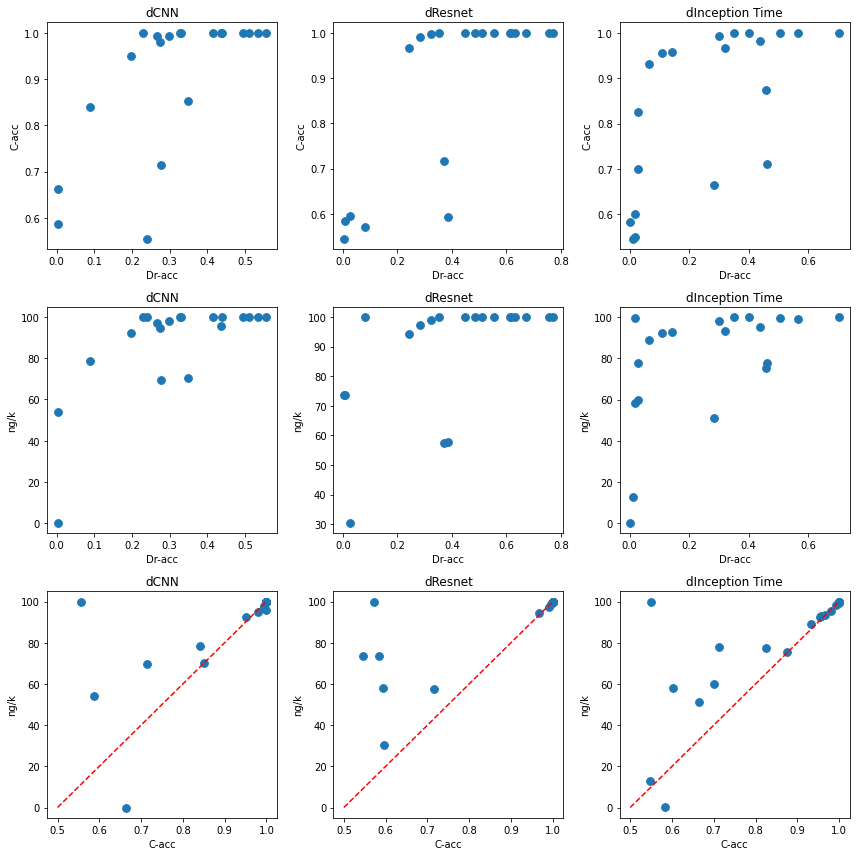

In [192]:
plt.figure(figsize=(12,12))

plt.subplot(3,3,1)
plt.scatter(df_explanation_synth['dcnn'],df_classification_synth['dcnn'],s=60)
plt.xlabel('Dr-acc')
plt.ylabel('C-acc')
plt.title('dCNN')

plt.subplot(3,3,2)
plt.scatter(df_explanation_synth['dresnet'],df_classification_synth['dresnet'],s=60)
plt.xlabel('Dr-acc')
plt.ylabel('C-acc')
plt.title('dResnet')

plt.subplot(3,3,3)
plt.scatter(df_explanation_synth['dinception'],df_classification_synth['dinception'],s=60)
plt.xlabel('Dr-acc')
plt.ylabel('C-acc')
plt.title('dInception Time')

plt.subplot(3,3,4)
plt.scatter(df_explanation_synth['dcnn'],df_success_permutation['dcnn'],s=60)
plt.xlabel('Dr-acc')
plt.ylabel('ng/k')
plt.title('dCNN')

plt.subplot(3,3,5)
plt.scatter(df_explanation_synth['dresnet'],df_success_permutation['dresnet'],s=60)
plt.xlabel('Dr-acc')
plt.ylabel('ng/k')
plt.title('dResnet')

plt.subplot(3,3,6)
plt.scatter(df_explanation_synth['dinception'],df_success_permutation['dinception'],s=60)
plt.xlabel('Dr-acc')
plt.ylabel('ng/k')
plt.title('dInception Time')


plt.subplot(3,3,7)
plt.scatter(df_classification_synth['dcnn'],df_success_permutation['dcnn'],s=60)
plt.xlabel('C-acc')
plt.ylabel('ng/k')
plt.title('dCNN')
plt.plot([0.5,1],[0,100],color='red',linestyle='--')

plt.subplot(3,3,8)
plt.scatter(df_classification_synth['dresnet'],df_success_permutation['dresnet'],s=60)
plt.xlabel('C-acc')
plt.ylabel('ng/k')
plt.title('dResnet')
plt.plot([0.5,1],[0,100],color='red',linestyle='--')

plt.subplot(3,3,9)
plt.scatter(df_classification_synth['dinception'],df_success_permutation['dinception'],s=60)
plt.xlabel('C-acc')
plt.ylabel('ng/k')
plt.title('dInception Time')
plt.plot([0.5,1],[0,100],color='red',linestyle='--')

plt.tight_layout()

---

### Influence of k (section 5.5)

This section analyzes the influence of the number of permutations
k on the discriminative features identification accuracy (Dr-acc).
We compute the Dr-acc for 20 different instances for which dCAM
is computed using a value of k between 1 and 400. 

#### Reproduce this experiment

To reproduce this experiment, please run the following code:

- Modify submit_generic.py such that the template of the bash scripts is compatible with your infrastruture.


- Run the following command:
```bash
python script_exp_influence_k_gpu_parallel.py
```
- This script will generate one bash file for each dataset and model that will be then run in parallel. These batch files will be stored in auto_script folder.



- Then, run the following command:
```bash
chmod 777 submit_all_influence_k.sh
./submit_all_influence_k.sh
```
- All the SLURM jobs will be laucnhed using sbatch command. The log files for each jobs will be stored in auto_script/output_log folder.



- The results will be stored in results_parameters/log_k_exp folder. At the end of the execution, please run the following command:
```bash
python script_generate_merged_param_influence_k_results.py
```
- An aggregated tables summarizing the results will be created  and sorted in results_parameters/merged_results_influence_k.csv. 

#### Experimental Results


In [4]:
df_influence_k = pd.read_csv('experiments/explanation/results_parameters/merged_results_influence_k.csv')
df_influence_k.rename(columns={'Unnamed: 0':'datasets'}, inplace=True)
df_influence_k.set_index('datasets', inplace=True)

def generate_curve(string,dims):
    if type(string) is not str:
        return [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],1
    result = []
    string_vals = string.split(';')[:-1]
    for val in string_vals:
        result.append(float(val))
        
    result = (np.array(result) - min(result))/(max(result) - min(result))
    f = interpolate.interp1d(dims, result)
    x_new = np.arange(min(dims),max(dims),1)
    y_new = f(x_new)
    for i,val in enumerate(y_new):
        if val > 0.9:
            reach = i
            break
    return result,reach





def generate_plot_convergence_k(method,type_d,dims):
    plt.title(method)
    #plt.xticks(dims[],dims)
    plt.xlim(dims[0],dims[-1])
    plt.ylim(0,1)
    plt.hlines(0.9,xmin=dims[0],xmax=dims[-1],linestyles='--',color='black')
    plt.ylabel('norm(Dr-acc)')
    plt.xlabel('Number of permutations k')
    plt.yticks([0,0.25,0.50,0.75,0.9,1],["a=0","a=0.25","a=0.5","a=0.75","a=0.9","a=1"])
    curve,reach = generate_curve(df_influence_k[method]['synth_ShapesAll_type{}_nbdim_10'.format(type_d)],dims)
    plt.plot(dims,curve,label='D=10',color='darkblue')
    plt.vlines(reach,0,0.9,linestyles='--',color='darkblue')
    curve,reach = generate_curve(df_influence_k[method]['synth_ShapesAll_type{}_nbdim_20'.format(type_d)],dims)
    plt.plot(dims,curve,label='D=20',color='lightblue')
    plt.vlines(reach,0,0.9,linestyles='--',color='lightblue')
    curve,reach = generate_curve(df_influence_k[method]['synth_ShapesAll_type{}_nbdim_40'.format(type_d)],dims)
    plt.plot(dims,curve,label='D=40',color='lightgreen')
    plt.vlines(reach,0,0.9,linestyles='--',color='lightgreen')
    curve,reach = generate_curve(df_influence_k[method]['synth_ShapesAll_type{}_nbdim_60'.format(type_d)],dims)
    plt.plot(dims,curve,label='D=60',color='darkgreen')
    plt.vlines(reach,0,0.9,linestyles='--',color='darkgreen')
    if type_d == 1:
        curve,reach = generate_curve(df_influence_k[method]['synth_ShapesAll_type{}_nbdim_100'.format(type_d)],dims)
        plt.plot(dims,curve,label='D=100',color='darkred')
        plt.vlines(reach,0,0.9,linestyles='--',color='darkred')
        

df_influence_k    

,dcnn,dresnet,dinception
datasets,,,
synth_ShapesAll_type1_nbdim_10,0.08317471481135356;0.13045553797123274;0.1710...,0.0829406135560105;0.11549970766814883;0.16129...,0.0710893368869797;0.23904447912131344;0.39759...
synth_ShapesAll_type1_nbdim_20,0.03889996665711023;0.07960735947870629;0.1471...,0.04609806506852345;0.0747954954516058;0.11521...,0.019815070601948318;0.07020703591231486;0.120...
synth_ShapesAll_type1_nbdim_40,0.015716731001695586;0.04336228291612712;0.089...,0.019446938550095067;0.041303077773683104;0.07...,0.00932314634374279;0.041634171011652336;0.079...
synth_ShapesAll_type1_nbdim_60,0.009514300457745798;0.038344691542619;0.08439...,0.012013057697953322;0.038547695218483044;0.08...,0.005674773759352031;0.04462948013601706;0.101...
synth_ShapesAll_type1_nbdim_100,NaN,NaN,NaN
synth_ShapesAll_type2_nbdim_10,0.1403815242777618;0.17300988466388503;0.19964...,0.18833356065490053;0.22007402247218724;0.2463...,0.06932624435353828;0.15730690149640733;0.2035...
synth_ShapesAll_type2_nbdim_20,0.02994870438158927;0.0356888845541881;0.04814...,0.08615201544804453;0.10881007402266434;0.1226...,0.0329583632277996;0.06792210167338272;0.12104...
synth_ShapesAll_type2_nbdim_40,0.010099046468934387;0.011948591592911948;0.01...,0.01644836847861092;0.016217118948302935;0.022...,0.007525361667547846;0.019945958050994517;0.03...
synth_ShapesAll_type2_nbdim_60,0.005690681374650816;0.006306898202240342;0.00...,0.006484346138532906;0.007926536986828237;0.00...,0.0035460930606960156;0.00427709455887442;0.01...


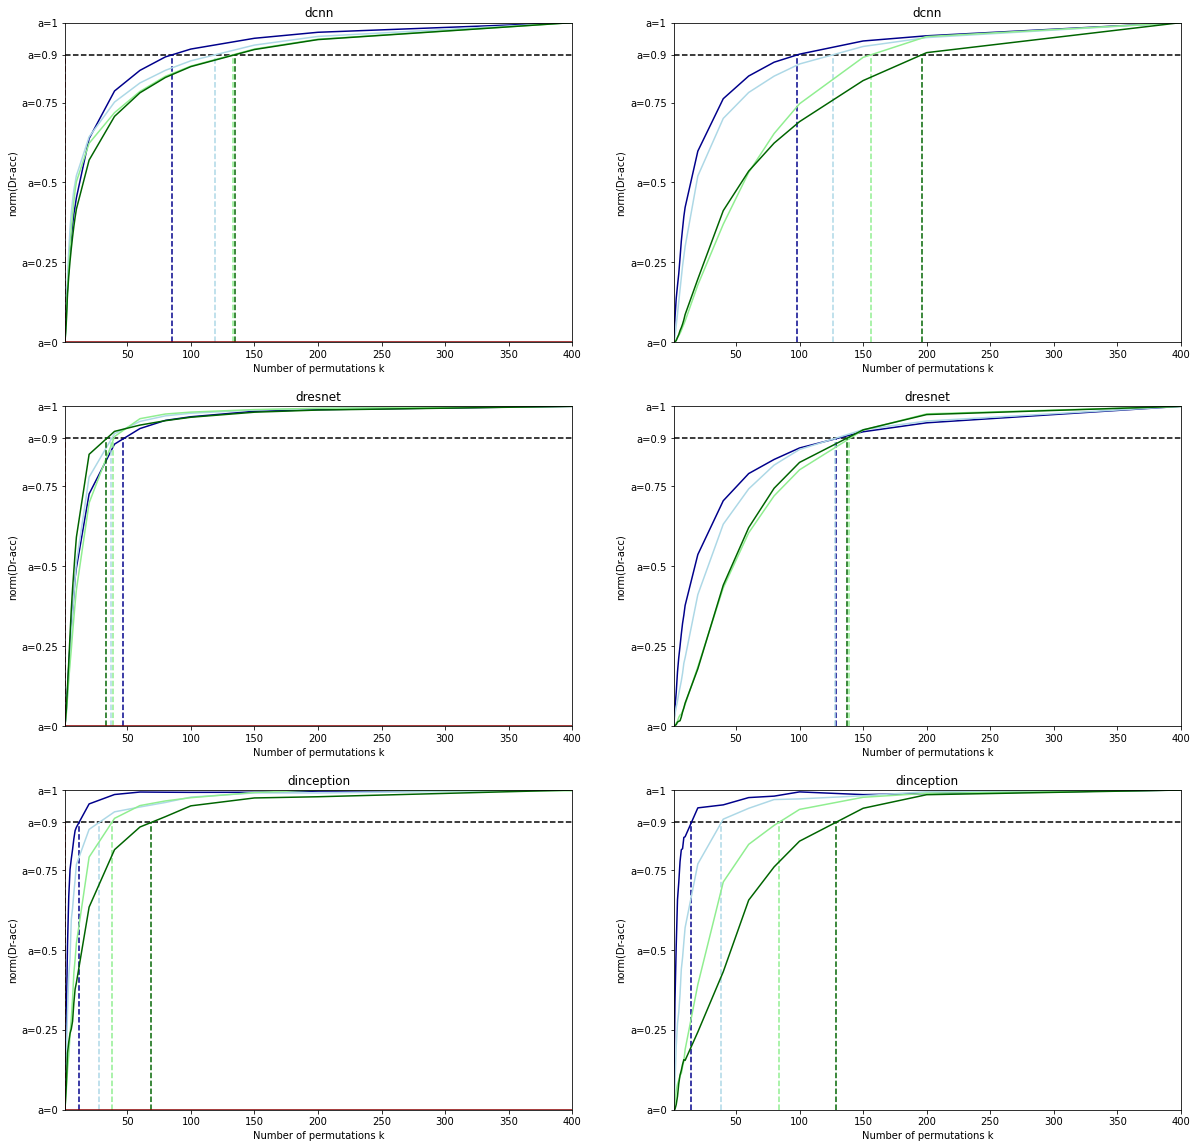

In [16]:
dims = [1,2,3,4,5,6,7,8,9,10,20,40,60,80,100,150,200,400]

plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
generate_plot_convergence_k('dcnn',1,dims)

plt.subplot(3,2,2)
generate_plot_convergence_k('dcnn',2,dims)

plt.subplot(3,2,3)
generate_plot_convergence_k('dresnet',1,dims)

plt.subplot(3,2,4)
generate_plot_convergence_k('dresnet',2,dims)

plt.subplot(3,2,5)
generate_plot_convergence_k('dinception',1,dims)

plt.subplot(3,2,6)
generate_plot_convergence_k('dinception',2,dims)



---

# Execution time evaluation (Section 5.7)


## Reproduce this experiment

To reproduce this experiment, please run the following code:

- Modify submit_generic.py such that the template of the bash scripts is compatible with your infrastruture.


- Run the following command:
```bash
python script_exp_gpu_parallel_dim.py
python script_exp_gpu_parallel_length.py
```
- This script will generate one bash file for each dataset and model that will be then run in parallel. These batch files will be stored in auto_script folder.



- Then, run the following command:
```bash
chmod 777 submit_all_epoch_exp_dim.sh
chmod 777 submit_all_epoch_exp_length.sh
./submit_all_epoch_exp_dim.sh
./submit_all_epoch_exp_length.sh
```
- All the SLURM jobs will be laucnhed using sbatch command. The log files for each jobs will be stored in auto_script/output_log folder.



- The results will be stored in results_epoch/log_dim and results_epoch/log_length folders. At the end of the execution, please run the following command:
```bash
python script_generate_merged_results_dim.py
python script_generate_merged_results_length.py
```
- An aggregated tables summarizing the results will be created  and sorted in results_epoch/merged_results_dim.csv and results_epoch/merged_results_length.csv. 



## Experimental Results: Training execution time evaluation

In [6]:
df_exec_dim = pd.read_csv('experiments/execution_time/results_epoch/merged_results_dim.csv')
df_exec_dim.rename(columns={'Unnamed: 0':'dims'}, inplace=True)
df_exec_dim['dims'] = [10,20,40,60,100]
df_exec_dim.set_index('dims', inplace=True)

df_exec_length = pd.read_csv('experiments/execution_time/results_epoch/merged_results_length.csv')
df_exec_length.rename(columns={'Unnamed: 0':'datasets'}, inplace=True)
df_exec_length.set_index('datasets', inplace=True)

display(df_exec_length)
display(df_exec_dim)

,mtex,cnn,inception,resnet,cresnet,ccnn,cinception,dcnn,dresnet,dinception
datasets,,,,,,,,,,
10,0.290488,0.334677,0.466892,0.687256,0.695033,0.330577,0.438817,0.332090,0.685729,0.440101
20,0.289525,0.338360,0.467544,0.689692,0.683266,0.333087,0.438456,0.336767,0.693787,0.442722
50,0.290776,0.341567,0.467773,0.693586,0.689009,0.333371,0.448154,0.378320,0.866815,0.502142
100,0.291258,0.339923,0.464597,0.701244,0.873869,0.349944,0.444758,0.383687,0.955132,0.504626
200,0.293570,0.340946,0.467651,0.698335,1.343804,0.537106,0.457573,0.575750,1.404490,0.517514
500,0.339628,0.383589,0.937229,0.800598,2.868599,1.071892,1.358494,1.107074,3.048783,1.389244
1000,0.346004,0.388914,0.543191,0.871854,5.387030,2.056006,1.440987,2.109863,5.697705,1.506632
5000,0.665258,1.081526,0.678648,1.284613,26.045379,10.094087,6.558964,10.364157,27.155610,6.875988
10000,1.142691,2.050993,1.073804,2.180178,54.507705,21.541470,12.943290,22.401181,56.274368,13.945950


,mtex,cnn,inception,resnet,cresnet,ccnn,cinception,dcnn,dresnet,dinception
dims,,,,,,,,,,
10,0.297229,0.342486,0.463674,0.702691,0.874322,0.348722,0.440359,0.380487,0.927132,0.502411
20,0.293651,0.337282,0.471502,0.706168,1.340403,0.536276,0.477533,0.588952,1.422947,0.545268
40,0.290482,0.351566,0.471656,0.707481,2.319057,0.921733,0.744856,1.050996,2.509720,0.870724
60,0.336461,0.387645,0.517749,0.768306,3.363327,1.259592,1.006288,1.493108,3.688971,1.231074
100,0.342849,0.401547,0.530411,0.950496,5.445929,1.986127,1.550226,2.995375,6.446001,2.474738


(10.0, 100.0)

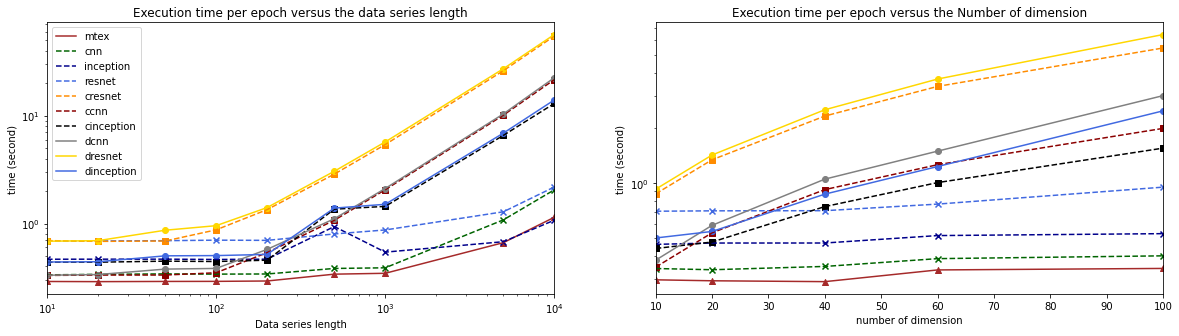

In [9]:
plt.figure(figsize=(20,5))

method_color = {
    'resnet': 'royalblue',
    'cresnet': 'darkorange',
    'dcnn': 'grey',
    'dresnet': 'gold',
    'dinception': 'royalblue',
    'cnn': 'darkgreen',
    'inception': 'darkblue',
    'ccnn': 'darkred',
    'cinception': 'black',
    'mtex': 'brown',
}

method_style = {
    'resnet': '--',
    'cresnet': '--',
    'dcnn': '-',
    'dresnet': '-',
    'dinception': '-',
    'cnn': '--',
    'inception': '--',
    'ccnn': '--',
    'cinception': '--',
    'mtex': '-',
}

method_scatter = {
    'resnet': 'x',
    'cresnet': 's',
    'dcnn': 'o',
    'dresnet': 'o',
    'dinception': 'o',
    'cnn': 'x',
    'inception': 'x',
    'ccnn': 's',
    'cinception': 's',
    'mtex': '^',
}

def generate_subplot(df_exec):
    for method in df_exec.columns:
        plt.plot(df_exec.index,df_exec[method],color=method_color[method],linestyle=method_style[method],label=method)
        plt.scatter(df_exec.index,df_exec[method],c=method_color[method],marker=method_scatter[method])
    plt.yscale('log')
    plt.ylabel('time (second)')
    

plt.subplot(1,2,1)
plt.title('Execution time per epoch versus the data series length')
generate_subplot(df_exec_length)
plt.xlabel('Data series length')
plt.xscale('log')
plt.legend()
plt.xlim(10,10000)

plt.subplot(1,2,2)
plt.title('Execution time per epoch versus the Number of dimension')
generate_subplot(df_exec_dim)
plt.xlabel('number of dimension')
plt.xlim(10,100)